In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
x = data.drop('target', axis=1)
y = data['target']

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
ypred= model.predict(xtest)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8365758754863813


# Grid Search

In [8]:

para={
    'solver':['newton-cg','lbfgs','liblinear'],
    'penalty':['none','l1','l2'],
    'C':range(1,100)
}

In [9]:
import warnings
warnings.simplefilter('ignore')

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
best = GridSearchCV(LogisticRegression(), para)
best.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': range(1, 100), 'penalty': ['none', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [12]:
best.best_params_

{'C': 39, 'penalty': 'l2', 'solver': 'lbfgs'}

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(accuracy_score(ytest,ypred))

0.8326848249027238


# Auto ML

In [14]:
import evalml

In [15]:
from evalml.preprocessing import split_data

In [16]:
xtrain,xtest,ytrain,ytest = split_data(x,y, problem_type='binary')

In [17]:
evalml.problem_types.ProblemTypes

<enum 'ProblemTypes'>

In [18]:
from evalml.automl import AutoMLSearch

In [19]:
auto = AutoMLSearch(xtrain,ytrain, problem_type='binary')
auto.search()

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer may not perform as estimated on unseen data.


{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:05',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer': '00:01',
  'Total time of batch': '00:06'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Classifier Select From Model': '00:02',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + RF Classifier Select From Model': '00:01',
  'Total time of batch': '00:04'},
 3: {'Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'LightGBM Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'Extra Trees Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'E

In [20]:
print(auto.best_pipeline)

XGBoost Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer


In [21]:
auto.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,10,XGBoost Classifier w/ Label Encoder + Replace ...,10,0.200906,0.200906,0.018918,98.804565,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,6,LightGBM Classifier w/ Label Encoder + Replace...,6,0.202744,0.202744,0.004222,98.793631,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.244768,0.244768,0.004796,98.543577,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,4,Random Forest Classifier w/ Label Encoder + Re...,4,0.275054,0.275054,0.009138,98.363371,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,7,Extra Trees Classifier w/ Label Encoder + Repl...,7,0.364033,0.364033,0.002047,97.833925,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,1,Logistic Regression Classifier w/ Label Encode...,1,0.369733,0.369733,0.052353,97.800007,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,3,Logistic Regression Classifier w/ Label Encode...,3,0.433287,0.433287,0.039076,97.421851,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,8,Elastic Net Classifier w/ Label Encoder + Repl...,8,0.442303,0.442303,0.043713,97.368204,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,9,CatBoost Classifier w/ Label Encoder + Replace...,9,0.613141,0.613141,0.002947,96.351680,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,5,Decision Tree Classifier w/ Label Encoder + Re...,5,1.430518,1.430518,0.763559,91.488109,True,"{'Label Encoder': {'positive_label': None}, 'I..."


In [22]:
auto.describe_pipeline(auto.rankings.iloc[0]["id"])


*******************************************************************************************************************
* XGBoost Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer *
*******************************************************************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Replace Nullable Types Transformer
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
4. Select Columns Transformer
	 * columns : ['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'thal']
5. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for b

In [23]:
best = auto.best_pipeline

In [24]:
best.score(xtest,ytest, objectives = ['auc','precision','recall','f1'])

OrderedDict([('AUC', 0.9963809523809525),
             ('Precision', 1.0),
             ('Recall', 0.9809523809523809),
             ('F1', 0.9903846153846153)])

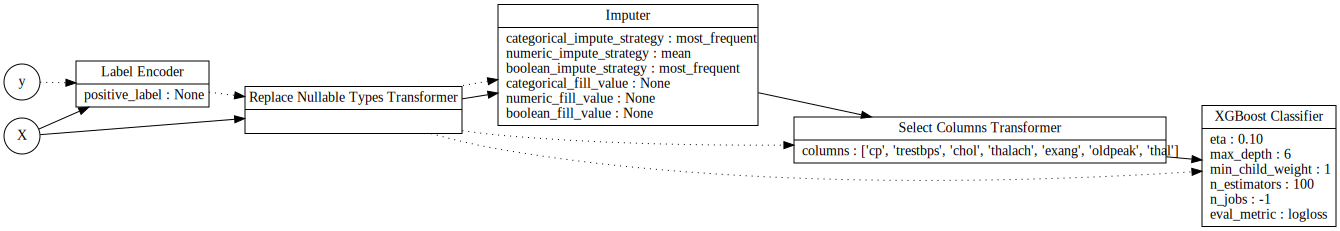

In [33]:
best.graph()

In [35]:
newmodel = auto.best_pipeline
newmodel.fit(xtrain,ytrain)

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'Label Encoder.y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Replace Nullable Types Transformer.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Select Columns Transformer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'thal']}, 'XGBoost Classifier':{'eta': 0.1, 'max_depth': 6, 'min_child_weight

In [36]:
pred = newmodel.predict(xtest)
print(accuracy_score(ytest,pred))

0.9902439024390244
